In [1]:
import time
start_time=time.time()

In [2]:
import sys
from pathlib import Path
import json
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


Input path

observations folder location

In [3]:
text_file_0 = open("path-observations.txt", "r")
path_obs = text_file_0.read()

In [4]:
datapath_obs = Path(path_obs).expanduser()

results folder location

In [5]:
text_file_1 = open("path-results.txt", "r")
path_res = text_file_1.read()

In [6]:
datapath_res= Path(path_res).expanduser()

files names

In [7]:
data_file = 'MUSE-Dor-N.fits'

In [8]:
name_export='MUSE-Dor-N'

In [9]:
hdulist = fits.open(str(datapath_obs)+'/'+data_file)

In [10]:
dist = 50000 #parsecs
pix = 0.2 #arcsec
seeing = 0.9 #seeing arcsec FWHM

In [11]:
pc = dist*(2*np.pi) / (360 * 60 * 60)
s0 = (seeing*pc)/2.355 #seeing pc RMS
pc,s0

(0.24240684055476797, 0.09263955689991132)

In [12]:
n = None
sb = hdulist[1].data[:n, :n].astype(np.float64)
vv = hdulist[2].data[:n, :n].astype(np.float64)
ss = hdulist[3].data[:n, :n].astype(np.float64)

In [13]:
## Replace spurious values in the arrays
m = ~np.isfinite(sb*vv*ss) | (sb < 0.0)
#m = m | (sb > 6e4) 
sb[m] = 0.0
vv[m] = np.nanmean(vv)
ss[m] = 0.0
sb /= sb.max()

good = (~m) & (sb > 0.001)

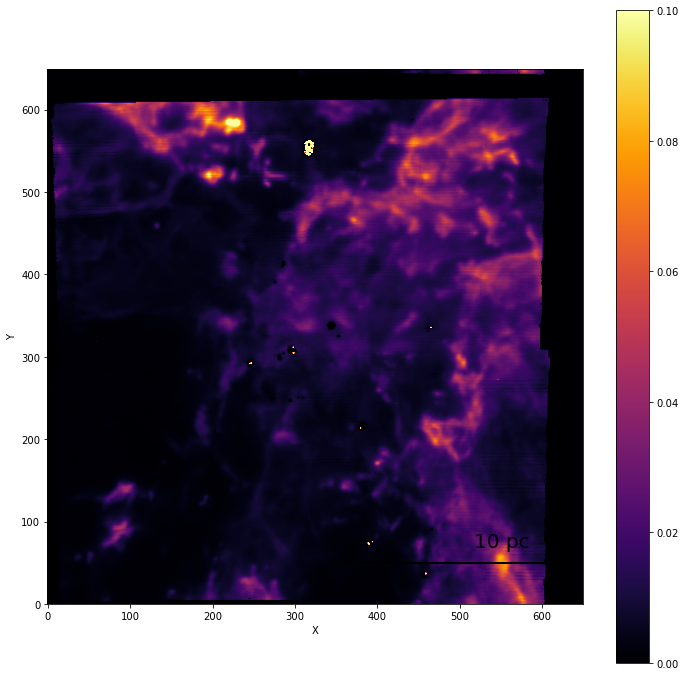

In [14]:
fig, ax = plt.subplots(figsize=(12, 12))


dataI=sb

plt.figure(1)
plt.imshow(dataI, cmap='inferno')

cbar = plt.colorbar()
plt.clim(0,0.1)
cbar.set_label(' ', rotation=270, labelpad=15)  

ax.set_xlabel('X')
ax.set_ylabel('Y')


ax.text(0.9, 0.1, '10 pc',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=20)
    
plt.axhline(y=50, xmin=0.59, xmax=0.925, linewidth=2, color = 'k')


plt.gca().invert_yaxis()

In [15]:
dffx=pd.DataFrame(sb)

In [16]:
dffx=dffx.stack().reset_index().rename(columns={'level_0':'X', 'level_1':'Y', 0:'I'})

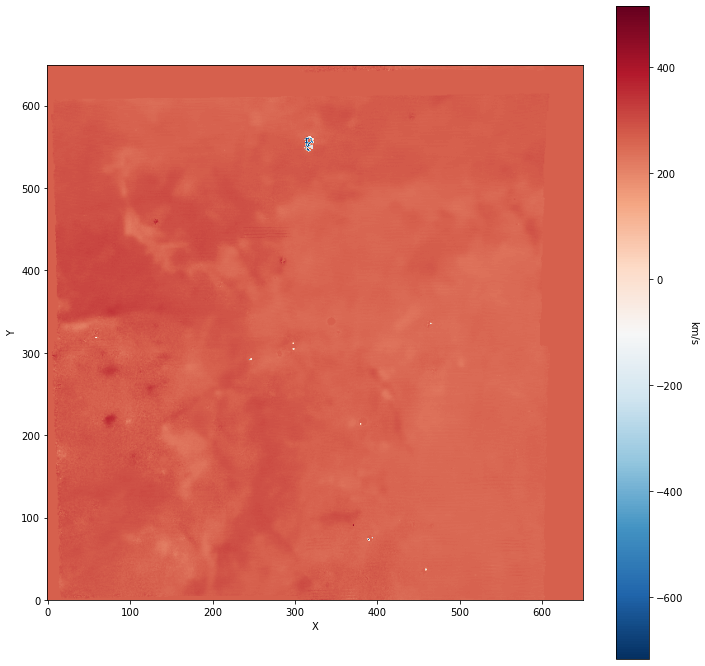

In [17]:
fig, ax = plt.subplots(figsize=(12, 12))


dataRV=vv

plt.figure(1)
plt.imshow(dataRV, cmap='RdBu_r')

cbar = plt.colorbar()
#plt.clim(200,350)
cbar.set_label('km/s', rotation=270, labelpad=15)  

ax.set_xlabel('X')
ax.set_ylabel('Y')


#ax.text(0.9, 0.1, '10 pc',
#        verticalalignment='bottom', horizontalalignment='right',
#        transform=ax.transAxes,
#        color='black', fontsize=20)
    
#plt.axhline(y=50, xmin=0.59, xmax=0.925, linewidth=2, color = 'k')


plt.gca().invert_yaxis()

In [18]:
RV=pd.DataFrame(vv)

In [19]:
RV=RV.stack().reset_index().rename(columns={'level_0':'X', 'level_1':'Y', 0:'RV'})

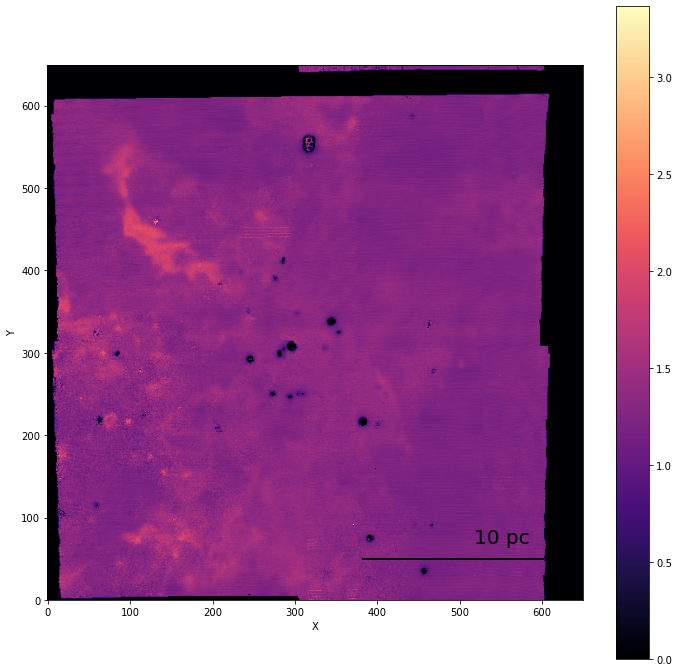

In [20]:
fig, ax = plt.subplots(figsize=(12, 12))


dataS=ss

plt.figure(1)
plt.imshow(dataS, cmap='magma')

cbar = plt.colorbar()
#plt.clim(225,350)
cbar.set_label(' ', rotation=270, labelpad=15)  

ax.set_xlabel('X')
ax.set_ylabel('Y')


ax.text(0.9, 0.1, '10 pc',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=20)
    
plt.axhline(y=50, xmin=0.59, xmax=0.925, linewidth=2, color = 'k')


plt.gca().invert_yaxis()

In [21]:
dsig=pd.DataFrame(ss)

In [22]:
dsig=dsig.stack().reset_index().rename(columns={'level_0':'X', 'level_1':'Y', 0:'Sig'})

In [23]:
data=RV
data['I']=dffx.I
data['Sig']=dsig.Sig
data.describe()

X              Y             RV              I  \
count  422500.000000  422500.000000  422500.000000  422500.000000   
mean      324.500000     324.500000     268.155593       0.010422   
std       187.638837     187.638837      21.147470       0.016656   
min         0.000000       0.000000    -715.899253       0.000000   
25%       162.000000     162.000000     256.848509       0.001643   
50%       324.500000     324.500000     268.155593       0.006232   
75%       487.000000     487.000000     277.037566       0.014201   
max       649.000000     649.000000     514.945087       1.000000   

                 Sig  
count  422500.000000  
mean        1.129239  
std         0.475943  
min         0.000000  
25%         1.201136  
50%         1.275455  
75%         1.357138  
max         3.364938

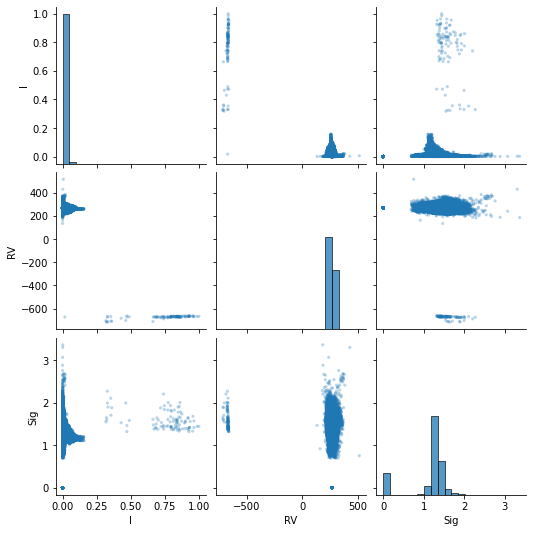

In [24]:
sns.pairplot(data, 
             vars=["I","RV","Sig"], 
             diag_kind='hist',  
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none'),
             diag_kws=dict(bins=20),
            )

In [25]:
mI=(data.I>0)&(data.I<0.25)&(data.RV>0)&(data.RV<400)

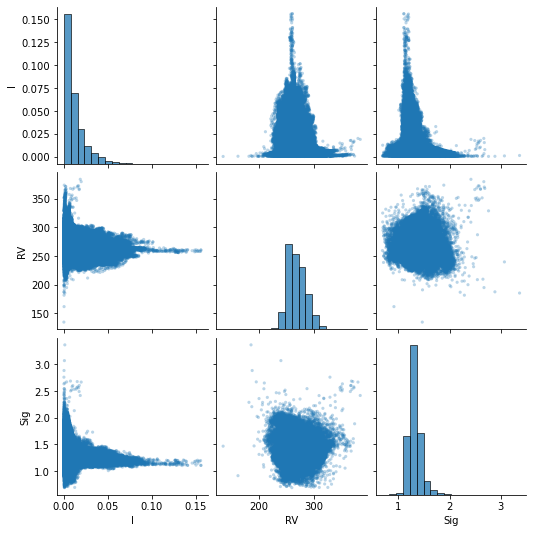

In [26]:
sns.pairplot(data[mI], 
             vars=["I","RV","Sig"], 
             diag_kind='hist',  
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none'),
             diag_kws=dict(bins=20),
            )

In [27]:
data[mI].describe()

X              Y             RV              I  \
count  362063.000000  362063.000000  362063.000000  362063.000000   
mean      308.309910     308.564736     268.409208       0.011957   
std       177.188984     171.292018      16.786106       0.012008   
min         0.000000       5.000000     134.610773       0.000203   
25%       155.000000     160.000000     255.336143       0.003877   
50%       307.000000     310.000000     266.379838       0.007830   
75%       462.000000     457.000000     279.520097       0.016035   
max       649.000000     609.000000     383.942980       0.156077   

                 Sig  
count  362063.000000  
mean        1.317294  
std         0.127978  
min         0.691312  
25%         1.236108  
50%         1.296085  
75%         1.372356  
max         3.364938

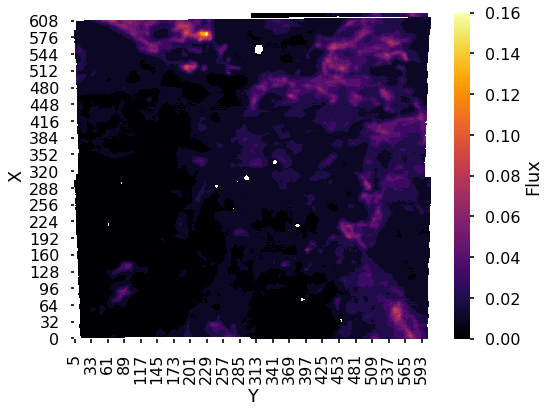

In [28]:
plt.style.use([
    "seaborn-poster",
])

fig = plt.figure(figsize=(8, 6))

ax = fig.add_subplot()

datal=data[mI].copy()
#datal.I=np.log10(datal.I)

datal.X=datal.X.astype(int)
dataH_f=(datal.round(2)).pivot(index='X', columns='Y', values='I')
sns.heatmap(dataH_f, cmap="inferno",xticklabels='auto',cbar_kws={'label': 'Flux'})
#plt.title('H$_{α}$ Flux')
#plt.title('NGC 604')
plt.gca().invert_yaxis()
#plt.savefig('Imgs//Flux//N604.pdf', bbox_inches='tight')


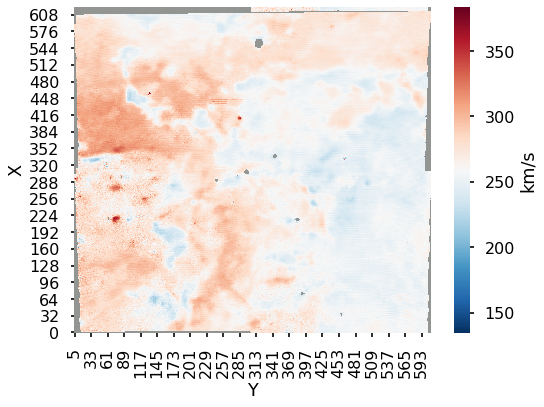

In [29]:
plt.style.use([
    "seaborn-poster",
])
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot()

#datal=data2.copy()

dataH_rv=(datal.round(2)).pivot(index='X', columns='Y', values='RV')
sns.heatmap(dataH_rv, cmap="RdBu_r",cbar_kws={'label': 'km/s'})
#plt.title('NGC 604')
ax.set_facecolor('xkcd:gray')

#plt.axhline(y=20, xmin=0.05, xmax=0.39, linewidth=2, color = 'k')

#ax.text(0.32, 0.9, '60 pc',
#        verticalalignment='bottom', horizontalalignment='right',
#        transform=ax.transAxes,
#        color='black', fontsize=20)

plt.gca().invert_yaxis()


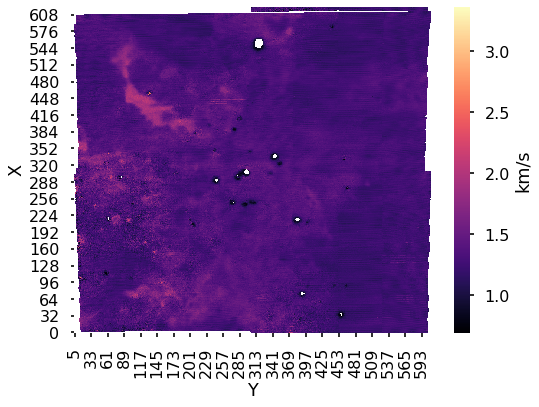

In [30]:
plt.style.use([
    "seaborn-poster",
])

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot()



dataH_s=(datal).pivot(index='X', columns='Y', values='Sig')

sns.heatmap(dataH_s, cmap="magma",cbar_kws={'label': 'km/s'})
#plt.title('H$_{α}$ σ')
plt.gca().invert_yaxis()


Text(0.5, 6.799999999999979, 'Radial velocity [km/s]')

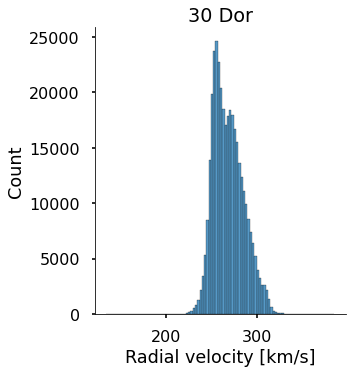

In [31]:
#sns.displot(RV[0]-RV[0].mean(),bins=100)
sns.displot(data[mI].RV,bins=100)

#plt.xlim(200,350)

#plt.text(0.75, 1.15,'n ='+str(RV[0].count()), ha='center', va='center', transform=ax.transAxes, color='k')
#plt.text(0.80, 0.82,'$μ$ ='+str(np.round(RV[0].mean(),2))+' km/s', ha='center', va='center', transform=ax.transAxes, color='k')
#plt.text(0.85, 1.25,'$σ^{2}$ ='+str(np.round(RV[0].var(),2))+' km$^{2}$/s$^{2}$', ha='center', va='center', transform=ax.transAxes, color='k')

plt.title('30 Dor')

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="15"
plt.xlabel('Radial velocity [km/s]')

In [32]:
data_export_list = {
        'name': name_export, 
        'pc' : pc,
        's0' : s0,
        'pix' : pix,
#         name_export : np.array(data[mI]),
        name_export : np.array(datal),
      }
data_export_list

{'name': 'MUSE-Dor-N',
 'pc': 0.24240684055476797,
 's0': 0.09263955689991132,
 'pix': 0.2,
 'MUSE-Dor-N': array([[0.00000000e+00, 3.06000000e+02, 2.70391580e+02, 3.38124135e-03,
         1.27638641e+00],
        [0.00000000e+00, 3.07000000e+02, 2.71262789e+02, 3.23487248e-03,
         1.25309709e+00],
        [0.00000000e+00, 3.08000000e+02, 2.74028960e+02, 3.21455619e-03,
         1.22710582e+00],
        ...,
        [6.49000000e+02, 6.00000000e+02, 2.57547119e+02, 2.70151835e-02,
         1.15213475e+00],
        [6.49000000e+02, 6.01000000e+02, 2.54742312e+02, 2.72152924e-02,
         1.14207148e+00],
        [6.49000000e+02, 6.02000000e+02, 2.59382792e+02, 2.53183982e-02,
         1.20159736e+00]])}

In [33]:
n = None

data_export_matrix = {
       'name': name_export, 
       'pc' : pc,
       's0' : s0,
       'pix' : pix,
       'sb' :np.array(hdulist[1].data[:n, :n].astype(np.float64)),
       'vv' : np.array(hdulist[2].data[:n, :n].astype(np.float64)),
       'ss' : np.array(hdulist[3].data[:n, :n].astype(np.float64)),

      }

data_export_matrix

{'name': 'MUSE-Dor-N',
 'pc': 0.24240684055476797,
 's0': 0.09263955689991132,
 'pix': 0.2,
 'sb': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'vv': array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 'ss': array([[0.68, 0.68, 0.68, ..., 0.68, 0.68, 0.68],
        [0.68, 0.68, 0.68, ..., 0.68, 0.68, 0.68],
        [0.68, 0.68, 0.68, ..., 0.68, 0.68, 0.68],
        ...,
        [0.68, 0.68, 0.68, ..., 0.68, 0.68, 0.68],
        [0.68, 0.68, 0.68, ..., 0.68, 0.68, 0.68],
        [0.68, 0.68, 0.68, ..., 0.68, 0.68, 0.68]])}

In [34]:
class MyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        else:
            return super(MyEncoder, self).default(obj)

In [35]:
jsonfilename =name_export +"-m.json"
with open(datapath_res/jsonfilename, "w") as f:
    json.dump(data_export_matrix, fp=f, indent=3, cls=MyEncoder)

In [36]:
jsonfilename =name_export +"-l.json"
with open(datapath_res/jsonfilename, "w") as f:
    json.dump(data_export_list, fp=f, indent=3, cls=MyEncoder)

In [37]:
datapath_res

WindowsPath('C:/Users/ZAINTEL2/Documents/Aeon/GitHub/PhD.Paper/result-files')

In [38]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 40.687581062316895 seconds ---


In [39]:
!jupyter nbconvert --to script --no-prompt otv-MUSE-Dor-N.ipynb

[NbConvertApp] Converting notebook otv-MUSE-Dor-N.ipynb to script
[NbConvertApp] Writing 6884 bytes to otv-MUSE-Dor-N.py
